In [1]:
import sys
sys.path.append('../')
import os
from codes.model.inception import build_Inception_pretrain
from codes.data.load_data import load_files

import numpy as np


In [2]:
#Prepare dataset
files = "C:\\dataset\BreaKHis_v1\\histology_slides\\breast"
experiment = "C:\\"
volumn = 7909
ratio = 0.7
list_dataset = load_files(src_folder=files,split=ratio, filenamepattern="*.png",dataset_volume = volumn,flag=1) 
train = list_dataset[0]
test = list_dataset[1]
val = list_dataset[2]

In [3]:
#inception
pretrain = build_Inception_pretrain(img_shape=(299,299,3),num_classes=1)
batch_size = 8
total_batch = (volumn * 0.7)//batch_size
train = train.shuffle(int(volumn * ratio))
train = train.batch(batch_size)
val = val.batch(batch_size)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization_v1[0][0]     
______________________________________________________________________________________________

In [4]:
from codes.data.utils import train_model 
epoches = 5
total_batch = (volumn * ratio)//batch_size
train_losses,val_losses = train_model(model=pretrain
                                ,dataset_train=train, dataset_val=val
                                , epochs = epoches
                                , print_interval=20 
                                , total_batch=total_batch
                                , train_vol=int(volumn * ratio)
                                , filename="C:\\inception_299x2999.h5")

[Epoch 0/5] [Batch 0/692] [T loss: 1.086097, acc:  62%] time: 0:02:55.133976
[Epoch 0/5] [Batch 20/692] [T loss: 1.338159, acc:  37%] time: 0:04:34.201237
[Epoch 0/5] [Batch 40/692] [T loss: 0.786304, acc:  62%] time: 0:06:14.609655
[Epoch 0/5] [Batch 60/692] [T loss: 0.500579, acc:  87%] time: 0:07:55.441141
[Epoch 0/5] [Batch 80/692] [T loss: 0.485075, acc:  87%] time: 0:09:36.617352
[Epoch 0/5] [Batch 100/692] [T loss: 0.332943, acc:  87%] time: 0:11:18.198137
[Epoch 0/5] [Batch 120/692] [T loss: 0.608059, acc:  75%] time: 0:12:59.575242
[Epoch 0/5] [Batch 140/692] [T loss: 0.044127, acc: 100%] time: 0:14:40.627062
[Epoch 0/5] [Batch 160/692] [T loss: 0.983503, acc:  50%] time: 0:16:21.051801
[Epoch 0/5] [Batch 180/692] [T loss: 0.572140, acc:  75%] time: 0:18:01.897398
[Epoch 0/5] [Batch 200/692] [T loss: 0.845474, acc:  62%] time: 0:19:41.604094
[Epoch 0/5] [Batch 220/692] [T loss: 0.971292, acc:  62%] time: 0:21:22.666879
[Epoch 0/5] [Batch 240/692] [T loss: 1.054078, acc:  62%] 

[Epoch 2/5] [Batch 280/692] [T loss: 0.582441, acc:  75%] time: 2:29:01.082632
[Epoch 2/5] [Batch 300/692] [T loss: 0.289008, acc:  87%] time: 2:30:40.461143
[Epoch 2/5] [Batch 320/692] [T loss: 0.361935, acc:  87%] time: 2:32:19.886156
[Epoch 2/5] [Batch 340/692] [T loss: 1.361187, acc:  37%] time: 2:33:59.299083
[Epoch 2/5] [Batch 360/692] [T loss: 0.117586, acc:  87%] time: 2:35:38.861468
[Epoch 2/5] [Batch 380/692] [T loss: 0.633416, acc:  75%] time: 2:37:18.254261
[Epoch 2/5] [Batch 400/692] [T loss: 0.723921, acc:  75%] time: 2:38:57.961471
[Epoch 2/5] [Batch 420/692] [T loss: 0.704923, acc:  62%] time: 2:40:39.110370
[Epoch 2/5] [Batch 440/692] [T loss: 0.359091, acc: 100%] time: 2:42:20.529848
[Epoch 2/5] [Batch 460/692] [T loss: 0.251961, acc:  75%] time: 2:44:01.545197
[Epoch 2/5] [Batch 480/692] [T loss: 0.465098, acc:  75%] time: 2:45:42.771597
[Epoch 2/5] [Batch 500/692] [T loss: 0.733872, acc:  62%] time: 2:47:24.886281
[Epoch 2/5] [Batch 520/692] [T loss: 0.154335, acc: 

[Epoch 4/5] [Batch 580/692] [T loss: 0.292932, acc:  87%] time: 4:57:55.791677
[Epoch 4/5] [Batch 600/692] [T loss: 0.661555, acc:  62%] time: 4:59:38.763815
[Epoch 4/5] [Batch 620/692] [T loss: 0.909844, acc:  50%] time: 5:01:20.374987
[Epoch 4/5] [Batch 640/692] [T loss: 0.039216, acc: 100%] time: 5:03:02.370839
[Epoch 4/5] [Batch 660/692] [T loss: 0.252959, acc:  87%] time: 5:04:44.006133
[Epoch 4/5] [Batch 680/692] [T loss: 0.030594, acc: 100%] time: 5:06:24.682321
[Epoch 4/5] [Batch 0/692] [E loss: 0.303046, acc:  87%] time: 5:07:21.426582
[Epoch 4/5] [Batch 20/692] [E loss: 0.002666, acc: 100%] time: 5:07:31.578677
[Epoch 4/5] [Batch 40/692] [E loss: 0.937024, acc:  75%] time: 5:07:42.013786
[Epoch 4/5] [Batch 60/692] [E loss: 0.532814, acc:  75%] time: 5:07:52.358149
[Epoch 4/5] [Batch 80/692] [E loss: 0.292381, acc:  87%] time: 5:08:02.796508
[Epoch 4/5] [Batch 100/692] [E loss: 0.002666, acc: 100%] time: 5:08:13.155180
[Epoch 4/5] [Batch 120/692] [E loss: 0.002666, acc: 100%] 

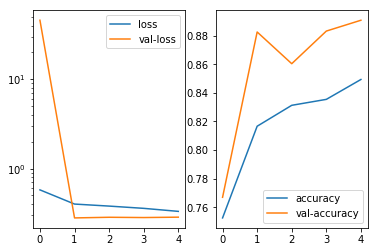

In [5]:
from codes.data.utils import plotting
plotting(train_losses,val_losses)

In [6]:
from codes.data.utils import predict_model_svm
predict_model_svm(pretrain,test,"c:\\test_inception_299x299.pkl")

------------------------Predict model-----------------------------
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[Tru

[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [

[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1

[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0

[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label:

[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ]

[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label:

[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True labe

[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ]

[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True labe

[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 1 ] [Predicted label: 1 ] [accuracy 100%]
[True label: 1 ] [Predicted label: 0 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 1 ] [accuracy 0%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 0 ] [Predicted label: 0 ] [accuracy 100%]
[True label: 1 ] [